In [11]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [12]:
from sklearn.metrics import classification_report

In [13]:
import pandas as pd
df=pd.read_csv("source_Xjiating.csv",encoding="utf-8")

df=df.dropna(axis=0)


In [14]:
df.shape

(8000, 40)

In [15]:
dfnew=pd.read_csv("source_y.csv",encoding="utf-8")

df=pd.concat([df,dfnew],axis=1)

df["happiness"].value_counts()

df["happiness"]=df["happiness"].map({1:0,2:1,3:2,4:3,5:4})
df=pd.concat([df[df["happiness"]==3].sample(frac=0.3),df[df["happiness"]!=3]],axis=0)
label=df["happiness"]
df["newcol_1"]=1
df["newcol_2"]=0
del df["happiness"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

In [16]:
col=[]
for i in df.columns:
    col.append(i.split("_")[0])

import numpy as np
l=[]
first=0
last=0
colname=[]
for ind,i in enumerate(col):
    last+=1
    if last==len(col):
         
         print (df[df.columns[first:last]])
         colname.append(df.columns[first:last][0][:-2])
         l.append(np.argmax(df[df.columns[first:last]].values,axis=1))
         break
    if col[last]!=col[last-1]:
         print (df[df.columns[first:last]])
         colname.append(df.columns[first:last][0][:-2])
#          print (np.argmax(df[df.columns[first:last]].values,axis=1).max())
         l.append(np.argmax(df[df.columns[first:last]].values,axis=1))
         first=last
         last=last+1
         
#          break

      child_cut_1  child_cut_2  child_cut_3  child_cut_4
2495            0            0            0            1
6673            0            0            1            0
288             0            0            1            0
2524            0            1            0            0
537             0            1            0            0
...           ...          ...          ...          ...
7987            0            0            1            0
7992            0            1            0            0
7995            0            1            0            0
7996            0            1            0            0
7998            1            0            0            0

[4627 rows x 4 columns]
      minor_child_cut_1  minor_child_cut_2  minor_child_cut_3  \
2495                  1                  0                  0   
6673                  1                  0                  0   
288                   0                  0                  1   
2524                  1        

In [17]:
colname

['child_cut',
 'minor_child_cut',
 'f_edu',
 'm_edu',
 'f_political',
 'm_political',
 's_work_status_cut',
 'newcol']

In [35]:
colname[0]='child'
colname[1]='minor_child'
colname[6]='s_work_status'

In [36]:
colname

['child',
 'minor_child',
 'f_edu',
 'm_edu',
 'f_political',
 'm_political',
 's_work_status',
 'newcol']

In [19]:
import pandas as pd

dfemd=pd.DataFrame()

embed_num=[]
for ind,i in enumerate(l):
    dfemd[ind]=i
    embed_num.append(len(dfemd[ind].unique())+2)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Input, Dropout, Bidirectional

from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import re
from tensorflow.keras.callbacks import Callback
import tensorflow
from tensorflow.keras.models import load_model
from sklearn import metrics
from sklearn.model_selection import KFold


def get_deep_wide_net():
    embedall=[]
    for ind,i in enumerate(dfemd.columns):
         embedall.append(Embedding(100, 128, input_length=1,
                      trainable=True))

    len(embedall)

    input1 = Input(shape=(X_train.shape[1], )) #模型的入口,设置输入的维度
    embedl=[]
    for i in range(len(embedall)):
        embedl.append(Input(shape=(1,)))

    l=[]
    for i in range(len(embedl)):
        l.append(embedall[i](embedl[i]))

    embedcat=Concatenate()(l)

    embedcat=Dense(128,activation="relu")(embedcat)

    floatdense=Dense(128)(input1)
    embedcatnew=Flatten()(embedcat)

    last=Concatenate()([embedcatnew,floatdense])
    output1=Dense(128)(last)
    output = Dense(5, activation='softmax')(output1)#softmax层

    model = Model(inputs=[input1]+embedl, outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#定义损失函数，优化器，评分标准
    model.summary()
    return model

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/ten

In [20]:
from sklearn import metrics
recal_all=[]
pre_all=[]
f1_all=[]
acc_all=[]
f1_micro=[]

t_recal_all=[]
t_pre_all=[]
t_f1_all=[]
t_acc_all=[]
t_f1_micro=[]
k=5
kf = KFold(n_splits=k, shuffle=True)
#     tmppre=np.zeros(y.shape)
ind=0
for (train, test) in  kf.split(df.values):
        print ("fold",ind,"start")
        X_train=df.values[train]
        y_train=label.values[train]
        emd_train=dfemd.values[train]
        emd_test=dfemd.values[test]
        train_all=[]
        train_all.append(X_train)
        for ind in range(emd_train.shape[1]):
            train_all.append(np.expand_dims(emd_train[:,ind],axis=1))
            
       
        X_test=df.values[test]
        testall=[]
        testall.append(X_test)
        for ind in range(emd_test.shape[1]):
            testall.append(np.expand_dims(emd_test[:,ind],axis=1))
#         break
        y_test=label.values[test]
        X_train=X_train.reshape(X_train.shape[0],X_train.shape[1])
        X_test=X_test.reshape(X_test.shape[0],X_test.shape[1])
        
        callbacks = [EarlyStopping(monitor='val_acc', verbose=1, patience=1000),
             ModelCheckpoint("model_wide_class_{}.hdf5".format(ind), monitor='val_acc',
                             mode='max', verbose=0, save_best_only=True,save_weights_only=True)]
        model_new = get_deep_wide_net()

        model_new.fit(train_all, y_train, epochs=20, batch_size=16, validation_data=(testall, y_test) ,callbacks=callbacks)
        model_new.load_weights("model_wide_class_{}.hdf5".format(ind)) #加载最优模型
        ypre=np.argmax(model_new.predict(testall),axis=-1)
        tmpacc=accuracy_score(y_test,ypre)
        tmppre=precision_score(y_test,ypre,average="macro")
        tmprecal=recall_score(y_test,ypre,average="macro")
        tmpf1=f1_score(y_test,ypre,average="macro")
        tmpf1_mic=f1_score(y_test,ypre,average="micro")
        print ("fold_{} acc: {} precision: {} recall : {} ,mac f1: {} ,mic f1: {}".format(ind,tmpacc,tmppre,tmprecal,tmpf1,tmpf1_mic))
        print ("test reprot: ",classification_report(y_test,ypre,digits=4))
        recal_all.append(tmprecal)
        acc_all.append(tmpacc)
        f1_all.append(tmpf1)
        pre_all.append(tmppre)
        f1_micro.append(tmpf1_mic)
        ind+=1

        ypre=np.argmax(model_new.predict(train_all),axis=-1)
        tmpacc=accuracy_score(y_train,ypre)
        tmppre=precision_score(y_train,ypre,average="macro")
        tmprecal=recall_score(y_train,ypre,average="macro")
        tmpf1=f1_score(y_train,ypre,average="macro")
        tmpf1_mic=f1_score(y_train,ypre,average="micro")
        print ("fold_{} train_acc: {} train_precision: {} train_recall : {},mac f1: {} ,mic f1: {}".format(ind,tmpacc,tmppre,tmprecal,tmpf1,tmpf1_mic))
        print ("train reprot: ",classification_report(y_train,ypre,digits=4))
        t_recal_all.append(tmprecal)
        t_acc_all.append(tmpacc)
        t_f1_all.append(tmpf1)
        t_pre_all.append(tmppre)
        t_f1_micro.append(tmpf1_mic)
    
print ("max acc:{}".format(max(acc_all)))
print ("min acc:{}".format(min(acc_all)))
print ("mean acc:{}".format(sum(acc_all)/5))


print ("max precision:{}".format(max(pre_all)))
print ("min precision:{}".format(min(pre_all)))
print ("mean precision:{}".format(sum(pre_all)/5))

print ("max recall:{}".format(max(recal_all)))
print ("min recall:{}".format(min(recal_all)))
print ("mean recall:{}".format(sum(recal_all)/5))



print ("max mac f1:{}".format(max(f1_all)))
print ("min mac f1:{}".format(min(f1_all)))
print ("mean mac f1:{}".format(sum(f1_all)/5))

print ("max mic f1:{}".format(max(f1_micro)))
print ("min mic f1:{}".format(min(f1_micro)))
print ("mean mic f1:{}".format(sum(f1_micro)/5))


print ("train max acc:{}".format(max(t_acc_all)))
print ("train min acc:{}".format(min(t_acc_all)))
print ("train mean acc:{}".format(sum(t_acc_all)/5))



print ("train max precision:{}".format(max(t_pre_all)))
print ("train min precision:{}".format(min(t_pre_all)))
print ("train mean precision:{}".format(sum(t_pre_all)/5))


print ("train max recall:{}".format(max(t_recal_all)))
print ("train min recall:{}".format(min(t_recal_all)))
print ("train mean recall:{}".format(sum(t_recal_all)/5))


print ("train max mac f1:{}".format(max(t_f1_all)))
print ("train min mac f1:{}".format(min(t_f1_all)))
print ("train mean mac f1:{}".format(sum(t_f1_all)/5))


print ("train max mic f1:{}".format(max(t_f1_micro)))
print ("train min mic f1:{}".format(min(t_f1_micro)))
print ("train mean mic f1:{}".format(sum(t_f1_micro)/5))

fold 0 start
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
___________________________________________

Epoch 11/20
3701/3701 [==============================] - 1s 236us/sample - loss: 1.3658 - acc: 0.3413 - val_loss: 1.4081 - val_acc: 0.3348
Epoch 12/20
3701/3701 [==============================] - 1s 234us/sample - loss: 1.3638 - acc: 0.3453 - val_loss: 1.4142 - val_acc: 0.3359
Epoch 13/20
3701/3701 [==============================] - 1s 247us/sample - loss: 1.3604 - acc: 0.3515 - val_loss: 1.4174 - val_acc: 0.3348
Epoch 14/20
3701/3701 [==============================] - 1s 230us/sample - loss: 1.3600 - acc: 0.3542 - val_loss: 1.4197 - val_acc: 0.3413
Epoch 15/20
3701/3701 [==============================] - 1s 240us/sample - loss: 1.3581 - acc: 0.3553 - val_loss: 1.4002 - val_acc: 0.3294
Epoch 16/20
3701/3701 [==============================] - 1s 227us/sample - loss: 1.3557 - acc: 0.3545 - val_loss: 1.4178 - val_acc: 0.3186
Epoch 17/20
3701/3701 [==============================] - 1s 235us/sample - loss: 1.3549 - acc: 0.3521 - val_loss: 1.4139 - val_acc: 0.3423
Epoch 18/20
3701/3701 [====

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

fold_7 acc: 0.3509719222462203 precision: 0.21761853058269995 recall : 0.2373790580995153 ,mac f1: 0.20486306764968773 ,mic f1: 0.3509719222462203
test reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        25
           1     0.0000    0.0000    0.0000       105
           2     0.3278    0.2611    0.2906       226
           3     0.3436    0.7301    0.4673       289
           4     0.4167    0.1957    0.2663       281

    accuracy                         0.3510       926
   macro avg     0.2176    0.2374    0.2049       926
weighted avg     0.3137    0.3510    0.2976       926

fold_8 train_acc: 0.3523372061604972 train_precision: 0.22317326736117957 train_recall : 0.23557037171954986,mac f1: 0.20256011486635286 ,mic f1: 0.3523372061604972
train reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        79
           1     0.0000    0.0000    0.0000       392
       

Epoch 7/20
3701/3701 [==============================] - 1s 298us/sample - loss: 1.3779 - acc: 0.3396 - val_loss: 1.3697 - val_acc: 0.3380
Epoch 8/20
3701/3701 [==============================] - 1s 293us/sample - loss: 1.3798 - acc: 0.3391 - val_loss: 1.3854 - val_acc: 0.3110
Epoch 9/20
3701/3701 [==============================] - 1s 276us/sample - loss: 1.3790 - acc: 0.3445 - val_loss: 1.3742 - val_acc: 0.3229
Epoch 10/20
3701/3701 [==============================] - 1s 286us/sample - loss: 1.3752 - acc: 0.3334 - val_loss: 1.3783 - val_acc: 0.3240
Epoch 11/20
3701/3701 [==============================] - 1s 307us/sample - loss: 1.3746 - acc: 0.3469 - val_loss: 1.3879 - val_acc: 0.3197
Epoch 12/20
3701/3701 [==============================] - 1s 311us/sample - loss: 1.3682 - acc: 0.3421 - val_loss: 1.3737 - val_acc: 0.3380
Epoch 13/20
3701/3701 [==============================] - 1s 274us/sample - loss: 1.3679 - acc: 0.3567 - val_loss: 1.3804 - val_acc: 0.3315
Epoch 14/20
3701/3701 [=======

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

fold_7 acc: 0.3412526997840173 precision: 0.20588599980010222 recall : 0.23366035891067183 ,mac f1: 0.21381651956759717 ,mic f1: 0.3412526997840173
test reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        17
           1     0.0000    0.0000    0.0000        93
           2     0.3459    0.3866    0.3651       238
           3     0.3472    0.2534    0.2930       296
           4     0.3363    0.5284    0.4110       282

    accuracy                         0.3413       926
   macro avg     0.2059    0.2337    0.2138       926
weighted avg     0.3023    0.3413    0.3127       926

fold_8 train_acc: 0.33909754120507973 train_precision: 0.2283842475674743 train_recall : 0.234907479134768,mac f1: 0.21408015247925344 ,mic f1: 0.33909754120507973
train reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        87
           1     0.1250    0.0025    0.0049       404
       

Epoch 7/20
3702/3702 [==============================] - 1s 223us/sample - loss: 1.3719 - acc: 0.3506 - val_loss: 1.3991 - val_acc: 0.3092
Epoch 8/20
3702/3702 [==============================] - 1s 225us/sample - loss: 1.3690 - acc: 0.3549 - val_loss: 1.4063 - val_acc: 0.3070
Epoch 9/20
3702/3702 [==============================] - 1s 225us/sample - loss: 1.3651 - acc: 0.3476 - val_loss: 1.4079 - val_acc: 0.2984
Epoch 10/20
3702/3702 [==============================] - 1s 222us/sample - loss: 1.3646 - acc: 0.3590 - val_loss: 1.4048 - val_acc: 0.3038
Epoch 11/20
3702/3702 [==============================] - 1s 237us/sample - loss: 1.3609 - acc: 0.3595 - val_loss: 1.4047 - val_acc: 0.3168
Epoch 12/20
3702/3702 [==============================] - 1s 229us/sample - loss: 1.3592 - acc: 0.3682 - val_loss: 1.4144 - val_acc: 0.3135
Epoch 13/20
3702/3702 [==============================] - 1s 212us/sample - loss: 1.3584 - acc: 0.3598 - val_loss: 1.4157 - val_acc: 0.3103
Epoch 14/20
3702/3702 [=======

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

fold_7 acc: 0.32 precision: 0.23000716134731158 recall : 0.21769281656506329 ,mac f1: 0.20274010016779692 ,mic f1: 0.32
test reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        16
           1     0.1818    0.0182    0.0331       110
           2     0.3189    0.2599    0.2864       227
           3     0.3191    0.5522    0.4044       297
           4     0.3302    0.2582    0.2898       275

    accuracy                         0.3200       925
   macro avg     0.2300    0.2177    0.2027       925
weighted avg     0.3005    0.3200    0.2902       925

fold_8 train_acc: 0.37709346299297675 train_precision: 0.2943039215616227 train_recall : 0.25769755566169406,mac f1: 0.24084735011089445 ,mic f1: 0.37709346299297675
train reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        88
           1     0.3333    0.0233    0.0435       387
           2     0.3619    0.2998

Epoch 7/20
3702/3702 [==============================] - 1s 245us/sample - loss: 1.3809 - acc: 0.3374 - val_loss: 1.3753 - val_acc: 0.3686
Epoch 8/20
3702/3702 [==============================] - 1s 229us/sample - loss: 1.3836 - acc: 0.3296 - val_loss: 1.3624 - val_acc: 0.3438
Epoch 9/20
3702/3702 [==============================] - 1s 228us/sample - loss: 1.3747 - acc: 0.3387 - val_loss: 1.3816 - val_acc: 0.3373
Epoch 10/20
3702/3702 [==============================] - 1s 222us/sample - loss: 1.3776 - acc: 0.3360 - val_loss: 1.3719 - val_acc: 0.3286
Epoch 11/20
3702/3702 [==============================] - 1s 227us/sample - loss: 1.3735 - acc: 0.3352 - val_loss: 1.3637 - val_acc: 0.3503
Epoch 12/20
3702/3702 [==============================] - 1s 224us/sample - loss: 1.3723 - acc: 0.3344 - val_loss: 1.3746 - val_acc: 0.3438
Epoch 13/20
3702/3702 [==============================] - 1s 220us/sample - loss: 1.3718 - acc: 0.3536 - val_loss: 1.3676 - val_acc: 0.3503
Epoch 14/20
3702/3702 [=======

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

fold_7 acc: 0.36864864864864866 precision: 0.22841240764486778 recall : 0.2484170055048426 ,mac f1: 0.22792132809345783 ,mic f1: 0.36864864864864866
test reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        19
           1     0.0000    0.0000    0.0000        97
           2     0.3333    0.2845    0.3070       232
           3     0.3417    0.6197    0.4406       284
           4     0.4670    0.3379    0.3921       293

    accuracy                         0.3686       925
   macro avg     0.2284    0.2484    0.2279       925
weighted avg     0.3364    0.3686    0.3364       925

fold_8 train_acc: 0.35089141004862234 train_precision: 0.21524280358248338 train_recall : 0.2374156387152254,mac f1: 0.21456193935921494 ,mic f1: 0.35089141004862234
train reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        85
           1     0.0000    0.0000    0.0000       400
    

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

In [21]:
import random

In [22]:
#model_new.load_weights("model_wide_class_{}.hdf5".format(ind))

In [23]:
from tqdm import tqdm
def get_important(col="gender",M=100,I=100):
    
    sumall=[]
    for num in tqdm(range(I)):
        num_fea=colname.index(col)+1
        for i in random.sample(list(range(len(train_all))),1):  # (1)随机采样一条样本xi
        #     print (i)
            xi=[]
            for j in range(len(train_all)):
                xi.append(train_all[j][i:i+1])
        tmp1=[]
        for i in range(M):
            for i in random.sample(list(range(len(train_all))),1): #(2)随机采样一条样本z
        #         print (i)
                z=[]
                for j in range(len(train_all)):
                    z.append(train_all[j][i:i+1])
            shutuf=random.sample(list(range(len(colname))),len(colname)) #(3)随机采样1到n排列 

            x_=[xi[0]]+list(np.array(xi[1:])[shutuf])#（4）
            z_=[z[0]]+list(np.array(z[1:])[shutuf])#(5)

            x_1=x_[:1+num_fea]+z_[1+num_fea:]
            x_2=x_[:num_fea]+z_[num_fea:] #(6)

        #     print (abs(np.mean(model_new.predict(x_1)-model_new.predict(x_2),axis=1)[0])) #(7)
            tmp1.append(abs(model_new.predict(x_1)-model_new.predict(x_2)))
        sumall.append(tmp1)
    return np.mean(np.array(sumall),axis=0)[0]

In [24]:
fea_import=[]
for col in colname:
    tmp=get_important(col,M=40,I=40)
    fea_import.append(tmp)

100%|██████████| 40/40 [00:08<00:00,  4.52it/s]


In [37]:
dfnew=pd.DataFrame(np.squeeze(np.array(fea_import)))
dfnew.columns=[str(i)+"_Importance" for  i in [1,2,3,4,5]]

In [38]:
dfnew.index=colname

In [39]:
dfnew=dfnew[:-1]

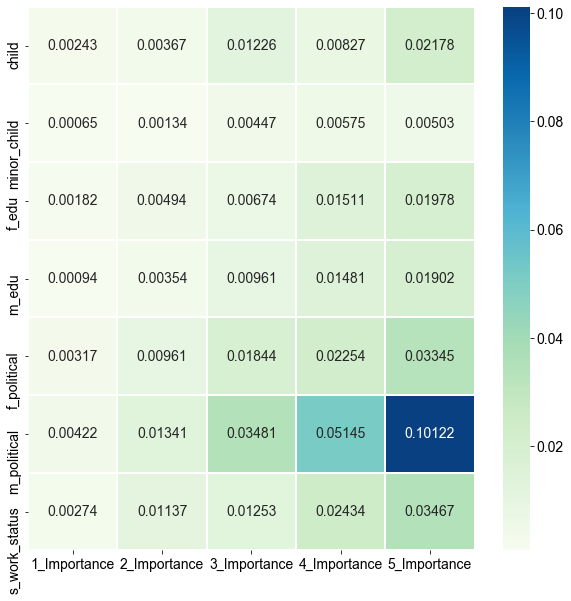

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['font.size'] = '14' 
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深-value家庭.png",dpi=300)

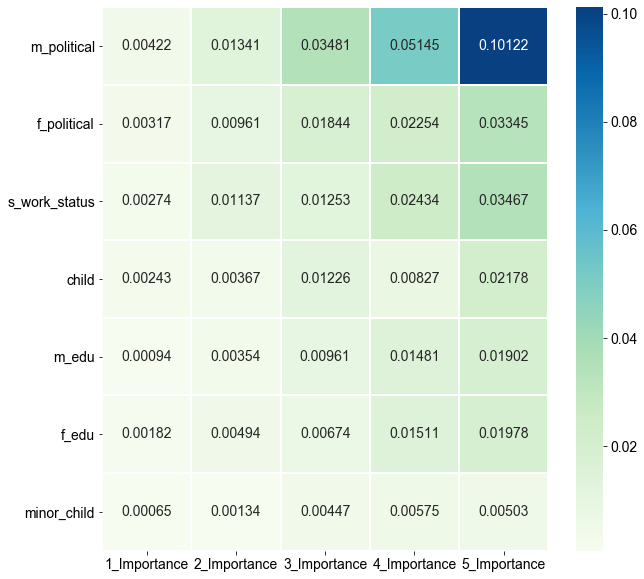

In [41]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:10]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前10个家庭.png",dpi=300)

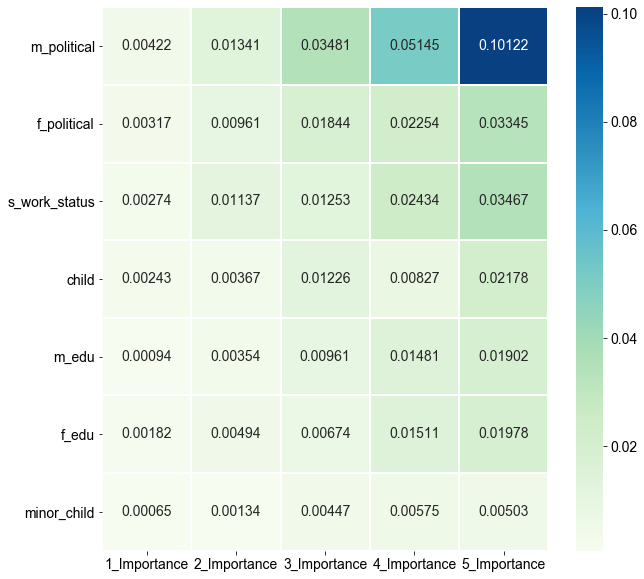

In [42]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:10]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.12宽深value_排序前10个家庭.pdf",dpi=300,bbox_inches='tight')

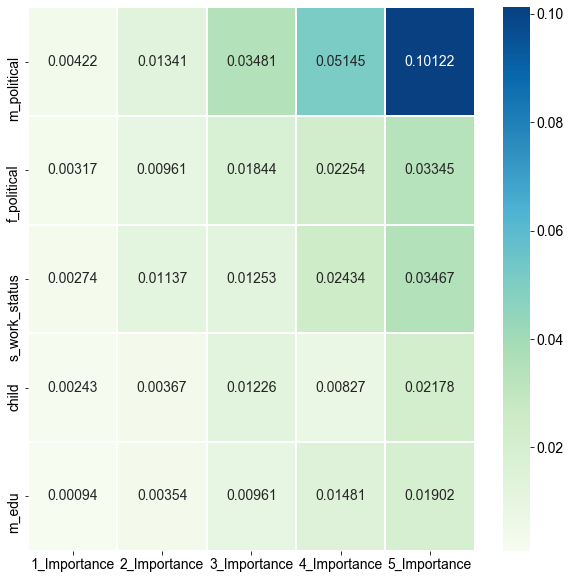

In [43]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:5]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前5个家庭.png",dpi=300)

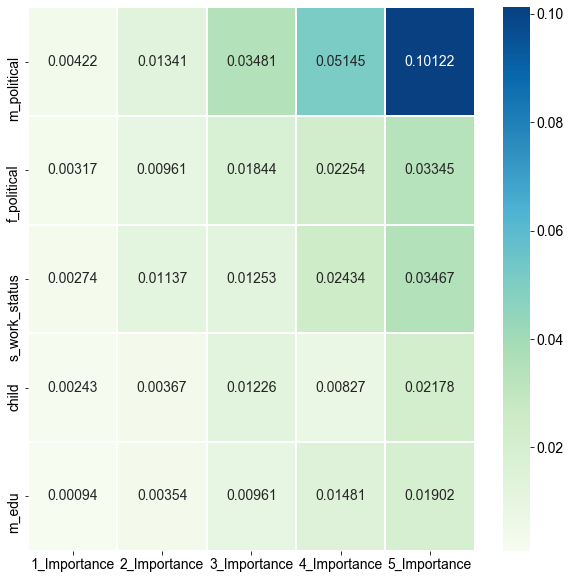

In [44]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:5]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.12宽深value_排序前5个家庭.pdf",dpi=300)

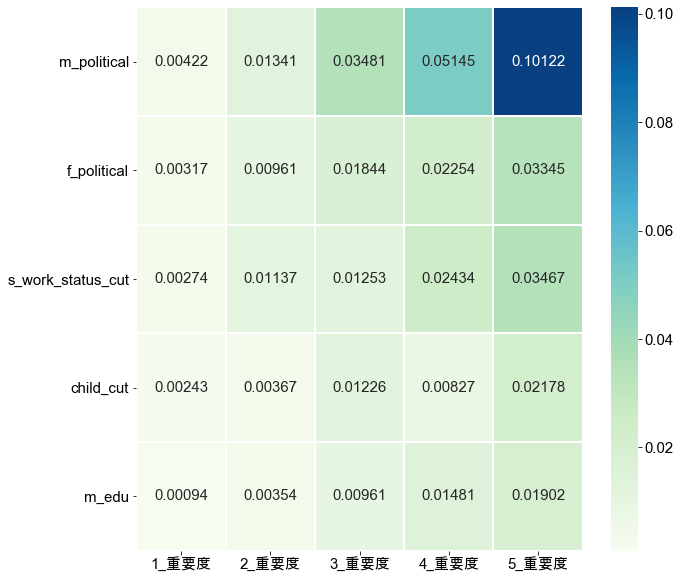

In [34]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:5]
plt.figure(figsize=(10,10))

sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前5个家庭大字.pdf",dpi=300,bbox_inches='tight')